In [1]:
import pandas as pd
import numpy as np 
from sklearn.model_selection import train_test_split
import csv
from pandas.tseries.offsets import MonthEnd
from datetime import datetime, timedelta, date
import requests
import json 
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
from sklearn.utils.multiclass import unique_labels

from scipy import stats
from IPython.display import display, HTML

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.models import load_model

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Reshape
from keras.layers import Convolution1D, MaxPooling1D
from keras.utils import np_utils
import seaborn as sns

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score

Using TensorFlow backend.


In [12]:
X_test_1 = pd.read_csv("/Users/fahad/project_repo/data/final/FB/2012_FB_X_test.csv ", index_col=0)
X_test_2 = pd.read_csv("/Users/fahad/project_repo/data/final/FB/2015_FB_X_test.csv", index_col=0)
y_test_1 = pd.read_csv("/Users/fahad/project_repo/data/final/FB/2012_FB_y_test.csv", index_col=0)
y_test_2 = pd.read_csv("/Users/fahad/project_repo/data/final/FB/2015_FB_y_test.csv", index_col=0)

In [14]:
X_test_1.head(1)

,0,1,2,3,4,5,6,7,8,9,...,350,351,352,353,354,355,356,357,358,359
0,0.029929,0.028808,0.027857,0.027136,0.041174,0.791813,0.426594,0.00624,0.002445,0.078528,...,0.060289,0.068483,0.065295,0.566616,0.334122,0.026864,0.017006,0.083706,0.0,0.0


In [15]:
X_test_2.head(1)

,0,1,2,3,4,5,6,7,8,9,...,350,351,352,353,354,355,356,357,358,359
0,0.222835,0.220764,0.218127,0.217003,0.25414,0.346891,0.287105,0.259087,0.239886,0.220645,...,0.186509,0.185868,0.128312,0.464233,0.419722,0.220317,0.232077,0.193444,0.0,0.0


In [16]:
y_test_1.head(1)

,Label
2012-07-31,0


In [17]:
y_test_2.head(1)

,Label_x
0,1


In [18]:
predictions = saved_model.predict_classes(np.array(X_test_1).reshape((*X_test_1.shape,1)),batch_size = X_test_1.shape[0], verbose=1)



41/41 [==============================] - 0s 5ms/step


In [19]:
saved_model = load_model('/Users/fahad/project_repo/models/final_models/1D_CNN_FE_98_11_model.h5')


In [20]:
from sklearn.metrics import accuracy_score
print ("saved model acc: %s" % accuracy_score(y_test_1, predictions))
# accuracy: (tp + tn) / (p + n)

# precision tp / (tp + fp)
precision = precision_score(y_test_1, predictions)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test_1, predictions)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test_1, predictions)
print('F1 score: %f' % f1)
 
# kappa
kappa = cohen_kappa_score(y_test_1, predictions)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(y_test_1, predictions)
print('ROC AUC: %f' % auc)

saved model acc: 0.4146341463414634
Precision: 0.541667
Recall: 0.500000
F1 score: 0.520000
Cohens kappa: -0.226933
ROC AUC: 0.383333


In [21]:
predictions_2 = saved_model.predict_classes(np.array(X_test_2).reshape((*X_test_2.shape,1)),batch_size = X_test_2.shape[0], verbose=1)


64/64 [==============================] - 0s 1ms/step


In [22]:
from sklearn.metrics import accuracy_score
print ("saved model acc: %s" % accuracy_score(y_test_2, predictions_2))
# accuracy: (tp + tn) / (p + n)

# precision tp / (tp + fp)
precision = precision_score(y_test_2, predictions_2)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test_2, predictions_2)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test_2, predictions_2)
print('F1 score: %f' % f1)
 
# kappa
kappa = cohen_kappa_score(y_test_2, predictions_2)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(y_test_2, predictions_2)
print('ROC AUC: %f' % auc)

saved model acc: 0.65625
Precision: 0.756757
Recall: 0.682927
F1 score: 0.717949
Cohens kappa: 0.280899
ROC AUC: 0.645811


In [23]:
%matplotlib inline

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title="Confusion Matrix",
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation="nearest", cmap=cmap)
    plt.title(title)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype("float")/ cm.sum(axis=1)[:,np.newaxis]
        print ("Normalised confusion matrix")
    else:
        print ("Confusion matrix, without normalisation")
        
    print (cm)
    
    thresh = cm.max()/2
    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j, i, cm[i,j],
        horizontalalignment = "center",
        color="white" if cm[i,j] > thresh else "black" )
        
    plt.tight_layout()
    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")
    

Confusion matrix, without normalisation
[[ 4 11]
 [13 13]]


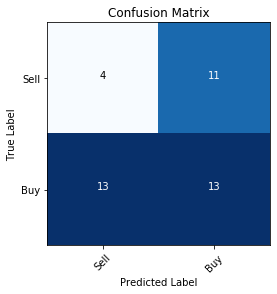

In [24]:
cm = confusion_matrix(y_test_1, predictions)
cm_labels = ['Sell', 'Buy']
plot_confusion_matrix(cm, cm_labels, title="Confusion Matrix")

Confusion matrix, without normalisation
[[14  9]
 [13 28]]


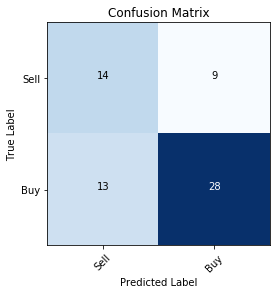

In [25]:
cm = confusion_matrix(y_test_2, predictions_2)
cm_labels = ['Sell', 'Buy']
plot_confusion_matrix(cm, cm_labels, title="Confusion Matrix")